# Borrower reliability research.

## General information about project.

**Client** - the bank's credit department.

**Data** - statistics on the clients' creditworthiness. 
* `children`: Number of children in the family
* `days_employed`: Total employment duration in days
* `dob_years`: Age of the client in years
* `education`: Client's education level
* `education_id`: Identifier for the education level
* `family_status`: Marital status
* `family_status_id`: Identifier for marital status
* `gender`: Client's gender
* `income_type`: Type of employment
* `debt`: Whether the client has overdue loan payments
* `total_income`: Monthly income
* `purpose`: Purpose of the loan

**Purposes of the study:**

1) Analyze whether the demographic factors listed below influence timely loan repayment.
    * Number of children
    * Marital status
    * Income level
    * Loan purpose      
2) Сreate the 'ideal' and 'undesirable' profiles of clients.
3) Identify possible reasons for missing values.

The results of the study will be taken into account when developing a credit scoring model—a specialized system that assesses the ability of potential borrowers to repay loans to the bank.

## 1. Exploration of the general information of the DataFrame.

Import the pandas library. Read data from a CSV file into a DataFrame and savе it in the variable `data`. 

In [4]:
import pandas as pd

In [5]:
data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

Display the first 20 rows of the DataFrame on the screen.

In [7]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


Display the basic information about the DataFrame using the `info()` method.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## 2. Data prepocessing.

### 2.1. Handling missing values.

Display the count of missing values for each column.

In [13]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

There are missing values in two columns. One of them is `days_employed`, which will be handled in the next step. The other column with missing values is `total_income`, which contains income data. Since the type of employment significantly influences income, the missing values in this column should be filled with the median income for each type from the `income_type` column.

In [15]:
for type in data['income_type'].unique():
    data.loc[(data['income_type'] == type) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == type), 'total_income'].median()

### 2.2. Handling outliers.

The data may contain artifacts (outliers) — values that do not reflect reality and may have resulted from some error. One such artifact is the negative number of days employed in the `days_employed` column. Handle the values in this column by replacing all negative values with their absolute values using the `abs()` method.

In [18]:
data['days_employed'] = data['days_employed'].abs()

For each employment type, display the median value of days_employed in days.

In [20]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

For two types (unemployed - 'безработные' and retirees - 'пенсионеры'), abnormally large values are obtained. Since this column will not be needed for the analysis, I will leave it as is due to the difficulty of correcting the values.

Display the list of unique values in the `children` column.

In [23]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

Remove the rows containing the anomalous values from the `children` column in the DataFrame `data`.

In [25]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

Ensure that the artifacts have been removed.

In [27]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### 2.3. Handling missing values (Continued).

Fill the missing values in the `days_employed` column with the median values for each employment type from the `income_type` column.

In [30]:
for type in data['income_type'].unique():
    data.loc[(data['income_type'] == type) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == type), 'days_employed'].median()

Ensure that all missing values have been filled.

In [32]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### 2.4. Changing data types.

Change the data type of the `total_income` column from float to integer using the `astype()` method.

In [35]:
data['total_income'] = data['total_income'].astype(int)

### 2.5. Handling duplicates.

Handle implicit duplicates in the `education` column. There are identical values recorded in different cases (uppercase and lowercase). Convert all values to lowercase. Check the other columns for similar issues.

In [38]:
data['education'] = data['education'].str.lower()

Display the number of duplicate rows in the data. If any duplicate rows are present, remove them.

In [40]:
data.duplicated().sum()

71

In [41]:
data = data.drop_duplicates()

### 2.6. Data categorization.

Based on the ranges specified below, create a new column `total_income_category` in the DataFrame `data` with the following categories:
* 0–30000 — 'E'
* 30001–50000 — 'D'
* 50001–200000 — 'C'
* 200001–1000000 — 'B'
* 1000001 and above — 'A'

In [44]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [45]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

Display the list of unique loan purposes from the `purpose` column.

In [47]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

Create a function named `categorize_purpose()` that categorizes the data from the `purpose` column into a new column called `purpose_category`, which will include the following categories:

* 'car transactions'
* 'real estate transactions'
* 'wedding'
* 'education'

In [49]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'car transactions'
        elif 'жил' in row or 'недвиж' in row:
            return 'real estate transactions'
        elif 'свад' in row:
            return 'wedding'
        elif 'образов' in row:
            return 'education'
    except:
        return 'no category'

In [50]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

Check the created categories in the `purpose_category` column.

In [52]:
data['purpose_category'].unique()

array(['real estate transactions', 'car transactions', 'education',
       'wedding'], dtype=object)

## 3. Exploring the data and answering the questions.

### 3.1. Is there a relationship between the number of children and timely loan repayment?

Create a pivot table comparing categories of individuals with and without debt, grouped by the number of children.

In [56]:
pivot_test=data.pivot_table(index='children',
                 columns='debt',
                 values='education',
                 aggfunc = 'count',
                 fill_value = 0
                )
pivot_test

debt,0,1
children,,
0,13028,1063
1,4364,444
2,1858,194
3,303,27
4,37,4
5,9,0


A useful column will be `contribution_of_group`, which represents the contribution of each group to the overall population. This metric can help determine whether to include specific groups in the analysis or exclude them due to a low contribution value. The threshold value will be 3%.

In [58]:
pivot_test['contribution_of_group'] = round((pivot_test[0]+pivot_test[1])/(pivot_test[0].sum()+pivot_test[1].sum())*100,1)

In [59]:
pivot_test

debt,0,1,contribution_of_group
children,,,
0,13028,1063,66.1
1,4364,444,22.5
2,1858,194,9.6
3,303,27,1.5
4,37,4,0.2
5,9,0,0.0


Add a column called `share_with_debt`, which will represent the proportion of debtors in each group.

In [61]:
pivot_test['share_with_debt']= round(pivot_test[1]/(pivot_test[0]+pivot_test[1])*100,1)

In [62]:
pivot_test

debt,0,1,contribution_of_group,share_with_debt
children,,,,
0,13028,1063,66.1,7.5
1,4364,444,22.5,9.2
2,1858,194,9.6,9.5
3,303,27,1.5,8.2
4,37,4,0.2,9.8
5,9,0,0.0,0.0


Consolidate everything created above into a function called `make_pivot(name_of_column_in_quotes)` for quicker resolution of subsequent tasks. The argument will be the name of the column being analyzed in quotes.

In [64]:
def make_pivot(name_of_column_in_qoutes):
    pivot_def=data.pivot_table(index=name_of_column_in_qoutes,
                 columns='debt',
                 values='education',
                 aggfunc = 'count',
                 fill_value = 0
                )
    pivot_def['contribution_of_group'] = round((pivot_def[0]+pivot_def[1])/(pivot_def[0].sum()+pivot_def[1].sum())*100,1)
    pivot_def['share_with_debt']= round(pivot_def[1]/(pivot_def[0]+pivot_def[1])*100,1)
    #To make it more convenient to reference the indices, rename columns '0' and '1' to 'without_debt' and 'with_debt', respectively.
    pivot_def = pivot_def.rename(columns={0: 'without_debt', 1: 'with_debt'})
    #For further processing, return the pivot table instead of using the print() command.
    return pivot_def 

Use the created function on the column being analyzed. To subsequent analysis of the pivot table assign the function's output to a new variable `pivot_children`.

In [66]:
pivot_children=make_pivot('children')

In [67]:
pivot_children

debt,without_debt,with_debt,contribution_of_group,share_with_debt
children,,,,
0,13028,1063,66.1,7.5
1,4364,444,22.5,9.2
2,1858,194,9.6,9.5
3,303,27,1.5,8.2
4,37,4,0.2,9.8
5,9,0,0.0,0.0


Remove groups with a contribution of less than 3%. Then, sort by the `share_with_debt` column in ascending order.

In [69]:
pivot_children_sorted=pivot_children.drop(index=[3, 4, 5], axis = 0).sort_values(by='share_with_debt', ascending=True)

In [70]:
pivot_children_sorted

debt,without_debt,with_debt,contribution_of_group,share_with_debt
children,,,,
0,13028,1063,66.1,7.5
1,4364,444,22.5,9.2
2,1858,194,9.6,9.5


Create a sorting function for future tasks, where the argument will be the pivot table itself. The result will be the modified pivot table with the same name.

In [72]:
def sort_pivot(pivot):
    for i in pivot.index:
        if pivot.loc[i,'contribution_of_group'] < 3:
            pivot.drop(index=i, axis = 0, inplace = True)     
    pivot.sort_values(by='share_with_debt', ascending=True, inplace=True)
    return pivot

Apply the sorting function to the analyzed pivot table and verify its functionality by comparing it with the manual sorting performed earlier.

In [74]:
sort_pivot(pivot_children)

debt,without_debt,with_debt,contribution_of_group,share_with_debt
children,,,,
0,13028,1063,66.1,7.5
1,4364,444,22.5,9.2
2,1858,194,9.6,9.5


To facilitate visual comparison, create a horizontal bar chart.

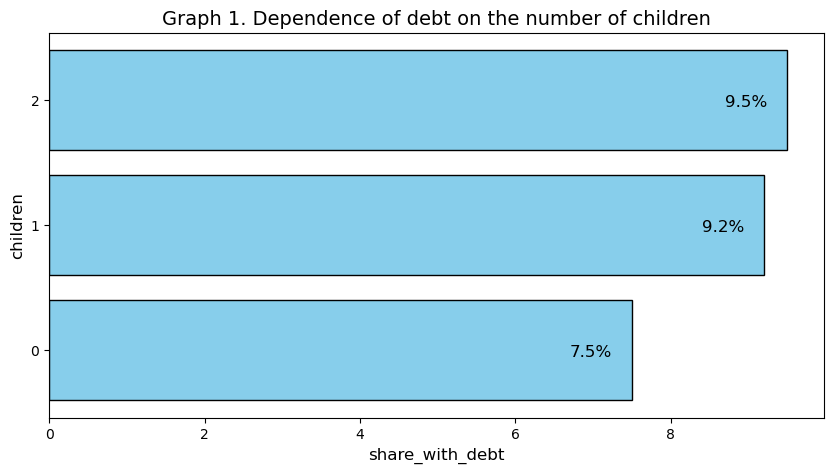

In [76]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.title('Graph 1. Dependence of debt on the number of children', fontsize = 14)
index = pivot_children.index
values = pivot_children['share_with_debt']
plt.barh(index, values, edgecolor='black', color = '#87CEEB')
plt.yticks(index)
plt.xlabel('share_with_debt', fontsize = 12)
plt.ylabel('children', fontsize = 12)
for index, value in enumerate(values):
    plt.text(value - 0.8, index-0.05, f'{str(value)}%', fontsize = 12)
plt.show()

**Conclusion:** People with three or more children rarely take out loans; therefore, the groups with 3, 4, and 5 children were not considered in the analysis. As shown in Graph 1, there is a correlation: as the number of children increases (from 0 to 2), the proportion of debtors among clients rises. Notably, the debtor shares for clients with 1 and 2 children are approximately equal. Thus, when approving loans, it is advisable to prioritize individuals without children.

### 3.2. Is there a relationship between marital status and timely loan repayment?

Apply both functions: first, use `make_pivot()` on the column `family_status` to analyze the relationship between marital status and timely loan repayment, and then sort the resulting pivot table using the `sort_pivot()` function. Assign the sorted pivot table to a new variable `pivot_family`.

In [80]:
pivot_family = sort_pivot(make_pivot('family_status'))

In [81]:
pivot_family

debt,without_debt,with_debt,contribution_of_group,share_with_debt
family_status,,,,
вдовец / вдова,888,63,4.5,6.6
в разводе,1105,84,5.6,7.1
женат / замужем,11334,927,57.5,7.6
гражданский брак,3749,385,19.4,9.3
Не женат / не замужем,2523,273,13.1,9.8


To facilitate visual comparison, create a horizontal bar chart.

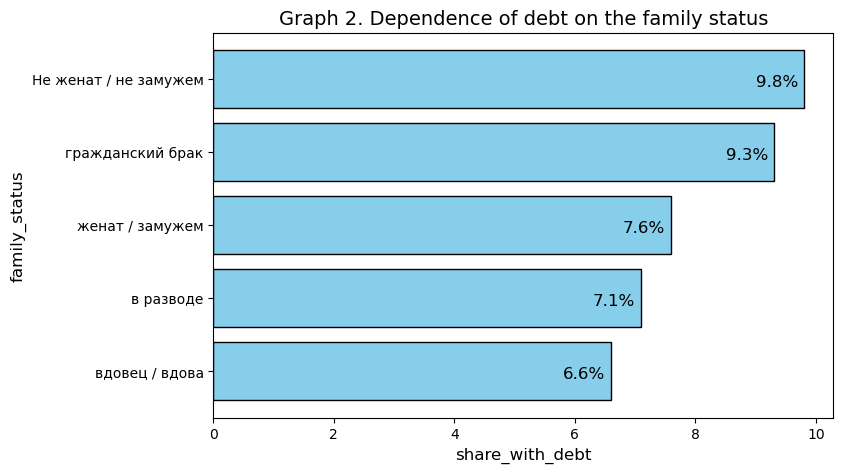

In [83]:
plt.figure(figsize=(8,5))
plt.title('Graph 2. Dependence of debt on the family status', fontsize = 14)
index = pivot_family.index
values = pivot_family['share_with_debt']
plt.barh(index, values, edgecolor='black', color = '#87CEEB')
plt.yticks(index)
plt.xlabel('share_with_debt', fontsize = 12)
plt.ylabel('family_status', fontsize = 12)
for index, value in enumerate(values):
    plt.text(value - 0.8, index-0.1, f'{str(value)}%', fontsize = 12)
plt.show()

**Conclusion:** According to Graph 2, the proportion of debtors in the groups increases in the following order:

1. Widower/Widow - 'вдовец / вдова'
2. Divorced - 'в разводе'
3. Married - 'женат / замужем'
4. Cohabiting - 'гражданский брак'
5. Single - 'Не женат / не замужем'
   
A significant increase is observed when moving from group 3 to group 4, with a rise of 1.7 percentage points. Therefore, it is more reliable to approve loans for clients with the marital statuses of widower/widow, divorced, or married than for those in a cohabiting relationship or single.

### 3.3. Is there a relationship between income level and timely loan repayment?

Follow the same sequence of actions as above.

In [87]:
pivot_income=sort_pivot(make_pivot('total_income_category'))

In [88]:
pivot_income

debt,without_debt,with_debt,contribution_of_group,share_with_debt
total_income_category,,,,
B,4660,354,23.5,7.1
C,14568,1353,74.6,8.5


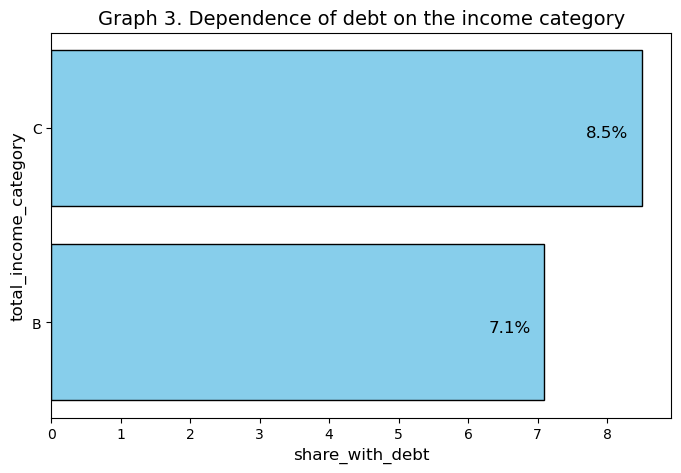

In [89]:
plt.figure(figsize=(8,5))
plt.title('Graph 3. Dependence of debt on the income category', fontsize = 14)
index = pivot_income.index
values = pivot_income['share_with_debt']
plt.barh(index, values, edgecolor='black', color = '#87CEEB')
plt.yticks(index)
plt.xlabel('share_with_debt', fontsize = 12)
plt.ylabel('total_income_category', fontsize = 12)
for index, value in enumerate(values):
    plt.text(value - 0.8, index-0.05, f'{str(value)}%', fontsize = 12)

plt.show()

**Conclusion:** Referring to Graph 3, individuals in income categories B and C are the most frequent borrowers, while the other categories were not included in the sample due to their rarity. A clear relationship exists: as one moves to higher income groups, the proportion of debtors decreases. Therefore, the higher the client's income, the more reliable they are as borrowers.

### 3.4. How do different loan purposes affect timely repayment?

Follow the standard sequence of actions to examine the impact of loan purposes on timely repayment.

In [93]:
pivot_purpose=sort_pivot(make_pivot('purpose_category'))

In [94]:
pivot_purpose

debt,without_debt,with_debt,contribution_of_group,share_with_debt
purpose_category,,,,
real estate transactions,9971,780,50.4,7.3
wedding,2130,183,10.8,7.9
car transactions,3879,400,20.1,9.3
education,3619,369,18.7,9.3


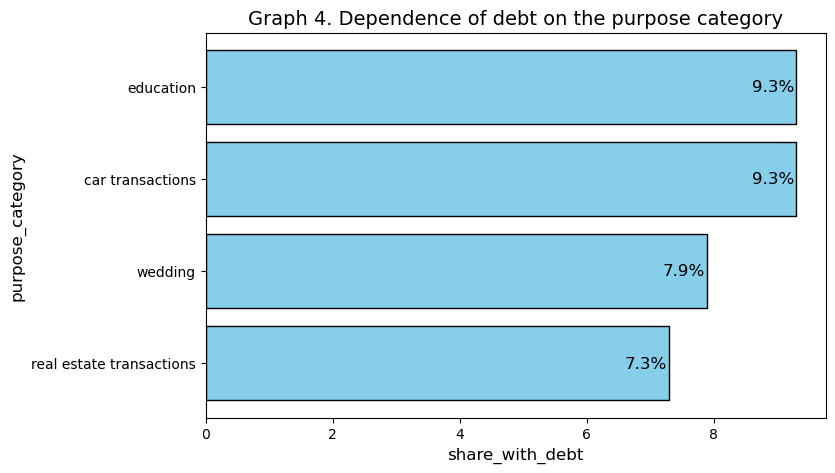

In [95]:
plt.figure(figsize=(8,5))
plt.title('Graph 4. Dependence of debt on the purpose category', fontsize = 14)

index = pivot_purpose.index
values = pivot_purpose['share_with_debt']
plt.barh(index, values, edgecolor='black', color = '#87CEEB')
plt.yticks(index)
plt.xlabel('share_with_debt', fontsize = 12)
plt.ylabel('purpose_category', fontsize = 12)
for index, value in enumerate(values):
    plt.text(value - 0.7, index-0.05, f'{str(value)}%', fontsize = 12)

plt.show()

**Conclusion:** In the group "real estate transactions," there are the fewest debtors, while the "wedding" group has 0.6 percentage points more. The groups "education" and "car transactions" have equal proportions of debtors, differing from the previous group by 1.4 percentage points. Based on Graph 4, it is generally preferable to approve loans for wedding expenses and real estate transactions.

### 3.5. What are the possible reasons for missing values in the original data?

According to the basic information about the DataFrame `data` using `info()` and `isna().sum()` methods, there are 2,174 missing values in both the `days_employed` and `total_income` columns. This suggests that these missing values may fall into the `MNAR - Missing Not At Random` category, where the mechanism of missingness is related to an unknown factor.

Possible reasons are:

1) **Error during data export:** There may have been an issue during the export process related to the `float64` data type. The `data.info()` output indicated that only these columns contain floating-point values.

2) **Broken logic of filling fields:** If one field is not filled, the system may prevent the filling of another field. It is essential to check the logic of the application form and ensure that mandatory fields are appropriately configured.

## 4. General conclusion.

### 4.1. Relationship of categories to timely loan repayment.
Based on the results of the completed work, it can be stated that a relationship between timely loan repayment has been identified for each category studied:

**Children:**

Individuals with three or more children rarely take out loans, so the groups with 3, 4, and 5 children were not considered in the analysis. As shown in Graph 1, there is a relationship: as the number of children increases (from 0 to 2), the proportion of debtors among clients rises. The debtor shares for clients with 1 and 2 children are approximately equal. **Therefore, when approving loans, it is advisable to prioritize those without children.**

**Marital Status:**

According to Graph 2, the proportion of debtors increases in the following order:

1. Widower/Widow - 'вдовец / вдова'
2. Divorced - 'в разводе'
3. Married - 'женат / замужем'
4. Cohabiting - 'гражданский брак'
5. Single - 'Не женат / не замужем'
   
A significant increase is observed when moving from group 3 to group 4, with a rise of 1.7 percentage points. **Thus, it is more reliable to approve loans for clients with the marital statuses of widower/widow, divorced, or married than for those in a cohabiting relationship or single.**

**Income Level:**

Referring to Graph 3, individuals in income categories B and C are the most frequent borrowers, while the other categories were not included in the sample due to their rarity. A clear relationship exists: as one moves to higher income groups, the proportion of debtors decreases. **Therefore, the higher the client's income, the more reliable they are as borrowers.**

**Loan Purpose:**

In the group "real estate transactions," there are the fewest debtors, while the "wedding" group has 0.6 percentage points more. The groups "education" and "car transactions" have equal proportions of debtors, differing from the previous group by 1.4 percentage points. **Based on Graph 4, it is generally preferable to approve loans for wedding expenses and real estate transactions.**

### 4.2. Profiles of an 'ideal' and 'undesirable' client.
**'Ideal' client profile:**
* Married or widower/widow
* No children
* Above-average income
* Purpose: real estate transactions or wedding expenses

**'Undesirable' client profile:**
* Single or cohabiting
* Has children
* Below-average income
* Purpose: car transactions or education
  
### 4.3. Possible reasons for missing values.
* **Error during data export:** There may have been an issue during the export process related to the `float64` data type.
* **Broken logic of filling fields:** If one of the fields ('days_employed' and 'total_income') is not filled, the system may prevent the filling of the other.